<a href="https://colab.research.google.com/github/AleynaKapusuz/BeardsDetection/blob/main/breadsdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/ColabNotebooks/BeardsDetect

In [ ]:
%pwd

In [103]:
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/107.7 GB disk)


In [105]:
!yolo detect train data=BeardsDetect/config.yaml model=yolov8n.pt epochs=25 workers=8 batch=8 name=yolov8_beards_detection

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/ColabNotebooks/İsGEDİK/BeardsDetect/config.yaml, epochs=25, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_beards_detection2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, 

In [114]:
!yolo detect predict model=BeardsDetect/runs/detect/yolov8_beards_detection/weights/best.pt source=/content/drive/MyDrive/ColabNotebooks/İsGEDİK/BeardsDetect/BeardsDataset/images/test save=True

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

image 1/29 /content/drive/MyDrive/ColabNotebooks/İsGEDİK/BeardsDetect/BeardsDataset/images/test/101.jpg: 640x640 1 beard, 350.2ms
image 2/29 /content/drive/MyDrive/ColabNotebooks/İsGEDİK/BeardsDetect/BeardsDataset/images/test/109.jpg: 640x640 1 beard, 338.4ms
image 3/29 /content/drive/MyDrive/ColabNotebooks/İsGEDİK/BeardsDetect/BeardsDataset/images/test/134.jpg: 640x640 1 beard, 332.6ms
image 4/29 /content/drive/MyDrive/ColabNotebooks/İsGEDİK/BeardsDetect/BeardsDataset/images/test/14.jpg: 640x640 2 beards, 320.2ms
image 5/29 /content/drive/MyDrive/ColabNotebooks/İsGEDİK/BeardsDetect/BeardsDataset/images/test/143.jpg: 640x640 1 beard, 349.3ms
image 6/29 /content/drive/MyDrive/ColabNotebooks/İsGEDİK/BeardsDetect/BeardsDataset/images/test/146.jpg: 640x640 2 beards, 194.5ms
image 7/29 /content/drive/MyDrive/ColabNotebook

In [115]:
import cv2
import imutils
from ultralytics import YOLO
from google.colab.patches import cv2_imshow


0: 640x640 1 beard, 236.4ms
Speed: 7.5ms preprocess, 236.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


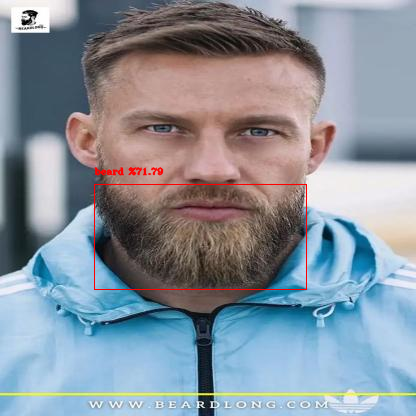

In [116]:
font = cv2.FONT_HERSHEY_TRIPLEX

img_path = "/content/drive/MyDrive/ColabNotebooks/İsGEDİK/BeardsDetect/BeardsDataset/images/test/143.jpg"
model_path = "/content/drive/MyDrive/ColabNotebooks/İsGEDİK/BeardsDetect/runs/detect/yolov8_beards_detection/weights/best.pt"

model = YOLO(model_path)
img = cv2.imread(img_path)

results = model(img)[0]

threshold = 0.5 #%50 nin altındaki bir değerde ise göstermesini istemiyorum
for result in results.boxes.data.tolist():
  x1, y1, x2, y2 , score, class_id = result
  x1, y1, x2, y2 , class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)
  if score > threshold:
    cv2.rectangle(img, (x1,y1), (x2,y2), (0,0,255), 1)

    class_name = results.names[class_id]
    score = score * 100
    text = f"{class_name:} %{score:.2f}"

    cv2.putText(img, text, (x1,y1-10), font, 0.3, (0,0,255), 1 , cv2.LINE_AA)

cv2_imshow(img)